# Keypoint-Detektor verstehen

In [1]:
import numpy as np
import cv2 as cv

In [2]:
cv.__version__

'4.6.0'

In [3]:
type(cv)

module

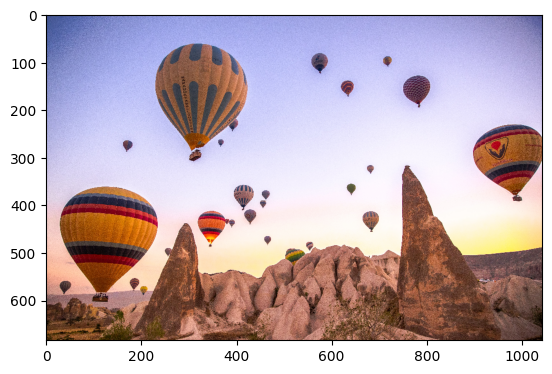

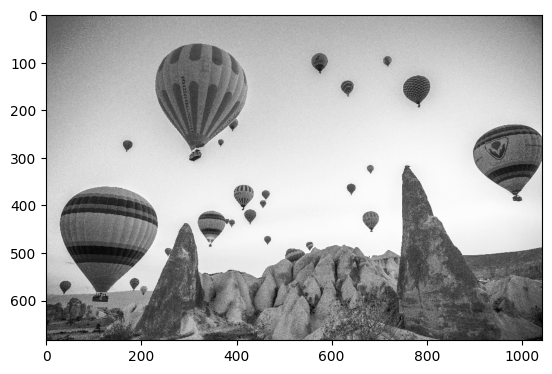

Bildauflösung ist (684, 1043, 3)


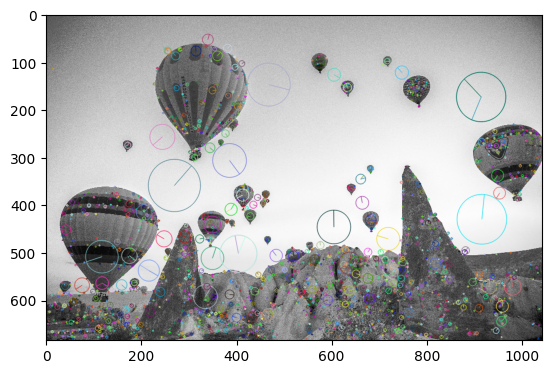

In [4]:
SCALE_FACTOR = 0.2
img_bgr = cv.imread("keypoint_detection_test_images/baloon2.jpg")
img_bgr = cv.resize(img_bgr, (0,0), fx=SCALE_FACTOR, fy=SCALE_FACTOR)
gray    = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

plt.imshow(img_rgb)
plt.show()

plt.imshow(gray, cmap="gray")
plt.show()

print("Bildauflösung ist", img_bgr.shape)

sift = cv.SIFT_create()
kp = sift.detect(gray, mask=None)
img_bgr = cv.drawKeypoints(gray,kp,img_bgr, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_bgr)
plt.show()

In [ ]:
len(kp)

In [ ]:
type(kp)

In [ ]:
kp[0].pt

In [ ]:
kp[0].size

In [ ]:
help(sift.create)

In [ ]:
help(cv.drawKeypoints)

# Keypoint-Matching verstehen

https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

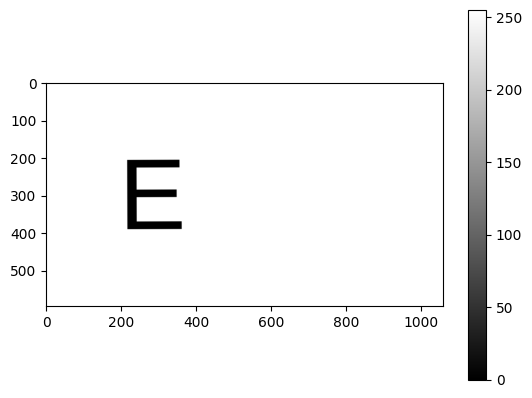

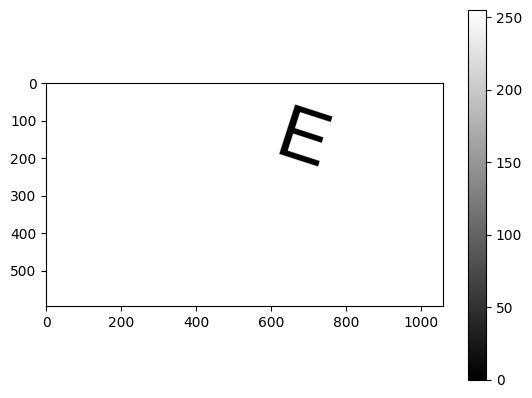

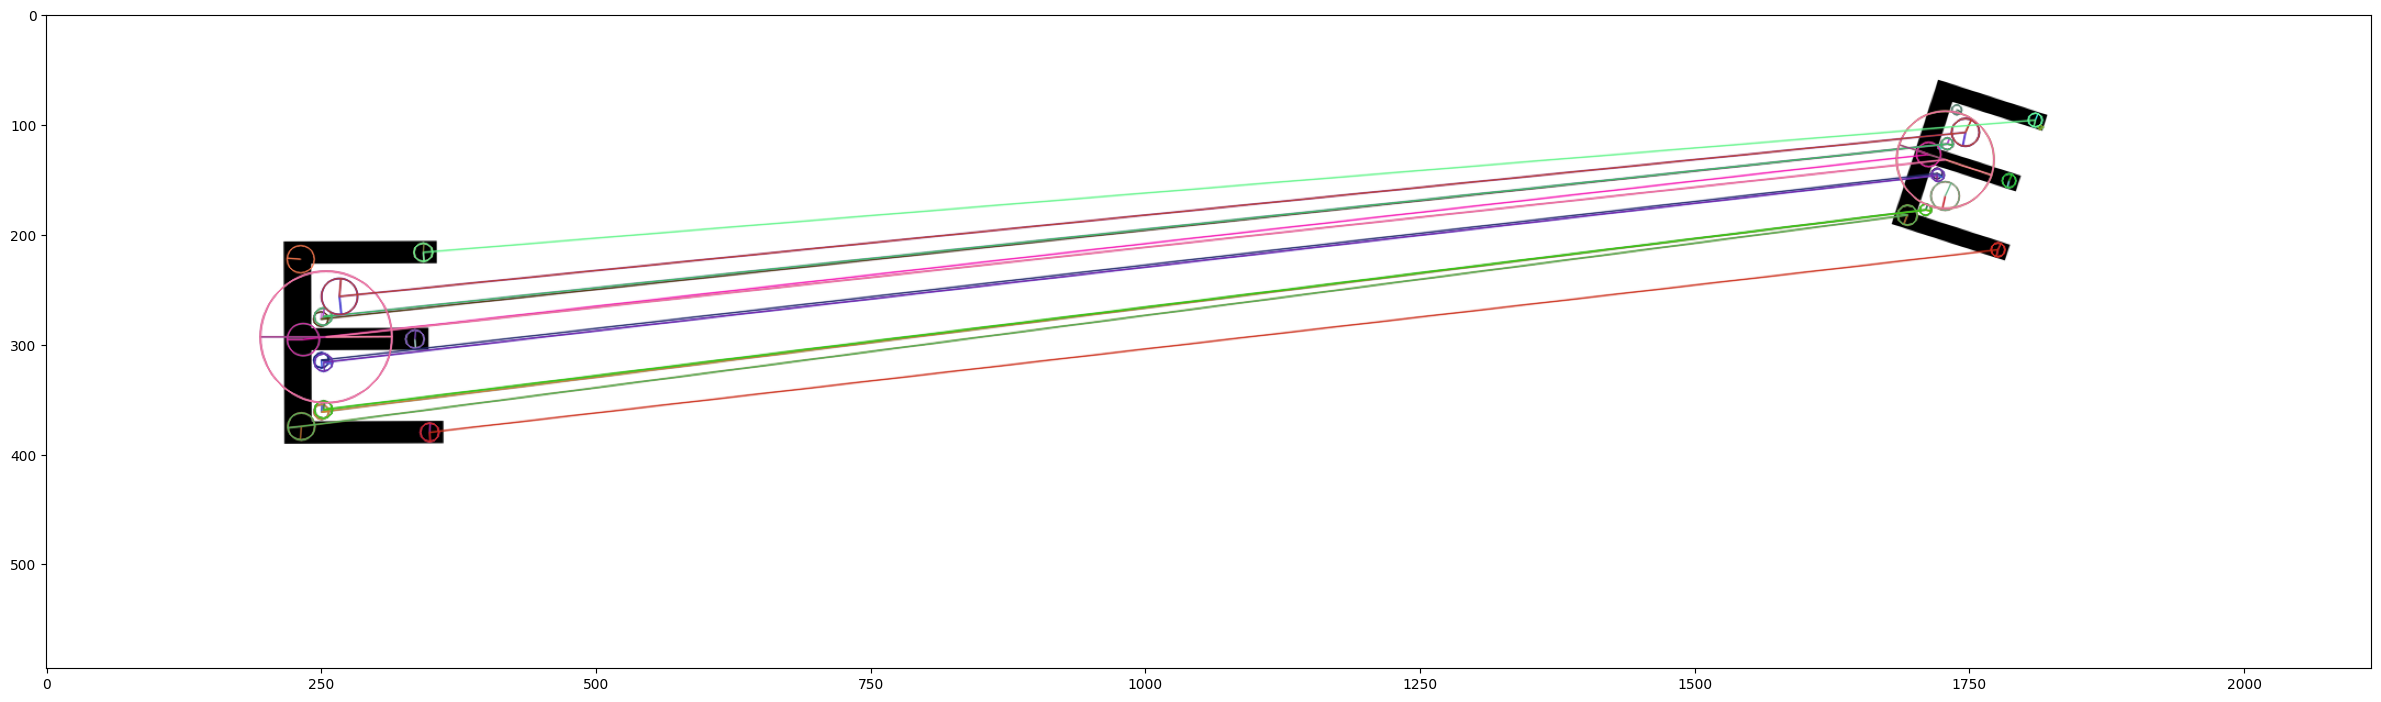

In [53]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('bild1.png',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('bild2.png',cv.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap="gray")
plt.colorbar()
plt.show()

plt.imshow(img2, cmap="gray")
plt.colorbar()
plt.show()

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
#img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,
#                         flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,
                         flags=cv.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(30,15))
plt.imshow(img3)
plt.savefig("matches.pdf")
plt.show()

In [50]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

In [37]:
len(kp1)

26

In [38]:
len(kp2)

28

In [40]:
des1.shape

(26, 128)

In [41]:
des2.shape

(28, 128)

In [47]:
matches

((< cv2.DMatch 0x7f12b859b450>, < cv2.DMatch 0x7f12b84685f0>),
 (< cv2.DMatch 0x7f12b87408d0>, < cv2.DMatch 0x7f12b8a8c670>),
 (< cv2.DMatch 0x7f12b87dfef0>, < cv2.DMatch 0x7f12b87df670>),
 (< cv2.DMatch 0x7f12b87dff10>, < cv2.DMatch 0x7f12b88c7f30>),
 (< cv2.DMatch 0x7f12b88c7490>, < cv2.DMatch 0x7f12b8660230>),
 (< cv2.DMatch 0x7f12b86606f0>, < cv2.DMatch 0x7f12b86608f0>),
 (< cv2.DMatch 0x7f12b86601f0>, < cv2.DMatch 0x7f12b8660290>),
 (< cv2.DMatch 0x7f12b8660650>, < cv2.DMatch 0x7f12b8660830>),
 (< cv2.DMatch 0x7f12b86603d0>, < cv2.DMatch 0x7f12b8660910>),
 (< cv2.DMatch 0x7f12b8660570>, < cv2.DMatch 0x7f12b8660c70>),
 (< cv2.DMatch 0x7f12b8660270>, < cv2.DMatch 0x7f12b86602d0>),
 (< cv2.DMatch 0x7f12b88029b0>, < cv2.DMatch 0x7f12b8802ad0>),
 (< cv2.DMatch 0x7f12b88024b0>, < cv2.DMatch 0x7f12b8802550>),
 (< cv2.DMatch 0x7f12b88024d0>, < cv2.DMatch 0x7f12b8802a90>),
 (< cv2.DMatch 0x7f12b88027b0>, < cv2.DMatch 0x7f12b8802970>),
 (< cv2.DMatch 0x7f12b853f310>, < cv2.DMatch 0x7f12b853

In [46]:
for m,n in matches:
    print(m,n)

< cv2.DMatch 0x7f12b859b450> < cv2.DMatch 0x7f12b84685f0>
< cv2.DMatch 0x7f12b87408d0> < cv2.DMatch 0x7f12b8a8c670>
< cv2.DMatch 0x7f12b87dfef0> < cv2.DMatch 0x7f12b87df670>
< cv2.DMatch 0x7f12b87dff10> < cv2.DMatch 0x7f12b88c7f30>
< cv2.DMatch 0x7f12b88c7490> < cv2.DMatch 0x7f12b8660230>
< cv2.DMatch 0x7f12b86606f0> < cv2.DMatch 0x7f12b86608f0>
< cv2.DMatch 0x7f12b86601f0> < cv2.DMatch 0x7f12b8660290>
< cv2.DMatch 0x7f12b8660650> < cv2.DMatch 0x7f12b8660830>
< cv2.DMatch 0x7f12b86603d0> < cv2.DMatch 0x7f12b8660910>
< cv2.DMatch 0x7f12b8660570> < cv2.DMatch 0x7f12b8660c70>
< cv2.DMatch 0x7f12b8660270> < cv2.DMatch 0x7f12b86602d0>
< cv2.DMatch 0x7f12b88029b0> < cv2.DMatch 0x7f12b8802ad0>
< cv2.DMatch 0x7f12b88024b0> < cv2.DMatch 0x7f12b8802550>
< cv2.DMatch 0x7f12b88024d0> < cv2.DMatch 0x7f12b8802a90>
< cv2.DMatch 0x7f12b88027b0> < cv2.DMatch 0x7f12b8802970>
< cv2.DMatch 0x7f12b853f310> < cv2.DMatch 0x7f12b853f110>
< cv2.DMatch 0x7f12b853f250> < cv2.DMatch 0x7f12b853f1d0>
< cv2.DMatch 0

## Kleiner Exkurs: Thresholding von Bildern bzw. Binärisierung

In [23]:
threshold, binarized_img1 = cv.threshold(img1,127,255,cv.THRESH_BINARY)

In [31]:
binarized_img1 = (img1 > 127).astype(int)

In [32]:
binarized_img1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [24]:
import numpy
len( numpy.unique( img1 ) )

256

In [33]:
numpy.unique( binarized_img1 )

array([0, 1])

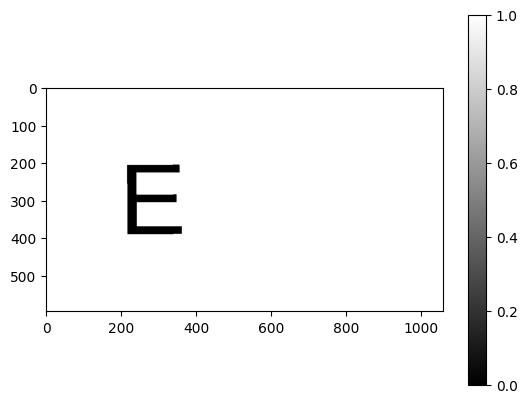

In [34]:
plt.imshow(binarized_img1, cmap="gray")
plt.colorbar()
plt.show()